# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [3]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run5/result-lstm-tcp21-hl2-seq2-do0.2-oov3500-part_9_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_9_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [4]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.344828,0,0,0,3684.588235,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.379310,1,1,0,5592.823529,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,1,0,4430.176471,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.379310,1,1,0,6121.552941,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.344828,0,0,0,3552.458824,0,0,0


In [5]:
df_truth.head()

,ID,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,BENIGN
1,192.168.10.8-54566-192.168.10.50-21-tcp,BENIGN
2,192.168.10.5-56939-192.168.10.50-21-tcp,BENIGN
3,192.168.10.15-55270-192.168.10.50-21-tcp,BENIGN
4,192.168.10.12-38566-192.168.10.50-21-tcp,BENIGN


In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        571
0         53
Name: count, dtype: int64

## Exploratory Data Analysis

In [7]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        571
0         53
Name: count, dtype: int64

In [8]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           449
0           175
Name: count, dtype: int64

In [9]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [10]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [11]:
df_pred["id"]

0        192.168.10.9-3856-192.168.10.50-21-tcp
1       192.168.10.8-54566-192.168.10.50-21-tcp
2       192.168.10.5-56939-192.168.10.50-21-tcp
3      192.168.10.15-55270-192.168.10.50-21-tcp
4      192.168.10.12-38566-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.17-53820-192.168.10.50-21-tcp
620    192.168.10.25-65243-192.168.10.50-21-tcp
621    192.168.10.12-57854-192.168.10.50-21-tcp
622    192.168.10.17-46473-192.168.10.50-21-tcp
623    192.168.10.25-56178-192.168.10.50-21-tcp
Name: id, Length: 624, dtype: object

In [12]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0        192.168.10.9-3856-192.168.10.50-21-tcp
1       192.168.10.8-54566-192.168.10.50-21-tcp
2       192.168.10.5-56939-192.168.10.50-21-tcp
3      192.168.10.15-55270-192.168.10.50-21-tcp
4      192.168.10.12-38566-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.17-53820-192.168.10.50-21-tcp
620    192.168.10.25-65243-192.168.10.50-21-tcp
621    192.168.10.12-57854-192.168.10.50-21-tcp
622    192.168.10.17-46473-192.168.10.50-21-tcp
623    192.168.10.25-56178-192.168.10.50-21-tcp
Name: ID, Length: 624, dtype: object

In [13]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [14]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [15]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
78,172.16.0.1-55190-192.168.10.50-21-tcp,0.393939,1,1,1,5924.838710,0,0,0,1
79,172.16.0.1-52896-192.168.10.50-21-tcp,0.485714,1,1,1,14627.363636,0,1,1,1
80,172.16.0.1-57818-192.168.10.50-21-tcp,0.486486,1,1,1,41258.600000,1,1,1,1
81,172.16.0.1-54194-192.168.10.50-21-tcp,0.558140,1,1,1,174684.780488,1,1,1,1
82,172.16.0.1-59444-192.168.10.50-21-tcp,0.379310,1,1,0,4703.851852,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
569,172.16.0.1-54400-192.168.10.50-21-tcp,0.485714,1,1,1,127094.030303,1,1,1,1
570,172.16.0.1-52972-192.168.10.50-21-tcp,0.513514,1,1,1,21773.857143,1,1,1,1
571,172.16.0.1-53486-192.168.10.50-21-tcp,0.513514,1,1,1,341716.228571,1,1,1,1
572,172.16.0.1-59598-192.168.10.50-21-tcp,0.454545,1,1,1,264843.193548,1,1,1,1


In [16]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.344828,0,0,0,3684.588235,0,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.379310,1,1,0,5592.823529,0,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,1,0,4430.176471,0,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.379310,1,1,0,6121.552941,0,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.344828,0,0,0,3552.458824,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
621,192.168.10.25-65243-192.168.10.50-21-tcp,0.356322,1,1,0,7254.823529,0,1,1,0
622,192.168.10.25-65243-192.168.10.50-21-tcp,0.356322,1,1,0,7254.823529,0,1,1,0
623,192.168.10.12-57854-192.168.10.50-21-tcp,0.367816,1,1,0,5822.117647,0,0,0,0
624,192.168.10.17-46473-192.168.10.50-21-tcp,0.344828,0,0,0,4530.835294,0,0,0,0


In [17]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.344828,0,0,0,3684.588235,0,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.379310,1,1,0,5592.823529,0,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,1,0,4430.176471,0,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.379310,1,1,0,6121.552941,0,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.344828,0,0,0,3552.458824,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
621,192.168.10.25-65243-192.168.10.50-21-tcp,0.356322,1,1,0,7254.823529,0,1,1,0
622,192.168.10.25-65243-192.168.10.50-21-tcp,0.356322,1,1,0,7254.823529,0,1,1,0
623,192.168.10.12-57854-192.168.10.50-21-tcp,0.367816,1,1,0,5822.117647,0,0,0,0
624,192.168.10.17-46473-192.168.10.50-21-tcp,0.344828,0,0,0,4530.835294,0,0,0,0


In [18]:
df_pred[['Label']].value_counts()

Label
1        496
0        130
Name: count, dtype: int64

In [19]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [20]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [21]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
621,0
622,0
623,0
624,0


### Detection Rate

In [22]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9556451612903226
Recall-Binary-b_iqr: 0.9475806451612904
Recall-Binary-b_zscore: 0.8810483870967742
Recall-Floating-f_mean: 0.6592741935483871
Recall-Floating-f_iqr: 0.8709677419354839
Recall-Floating-f_zscore: 0.8346774193548387


### Confussion Matrix

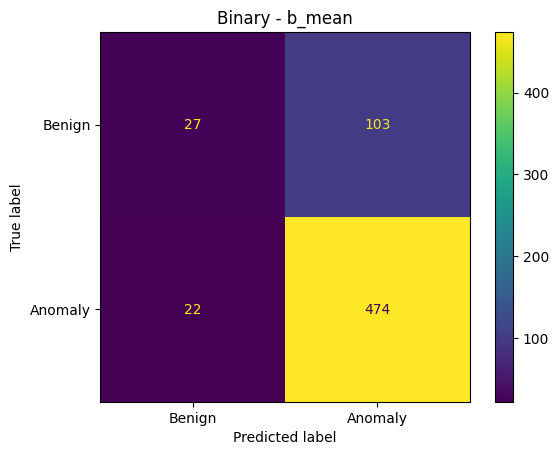

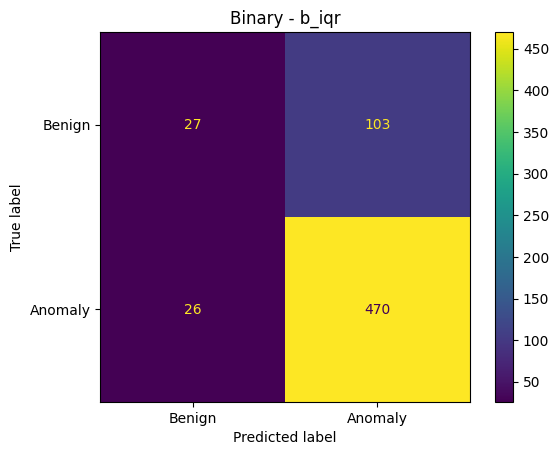

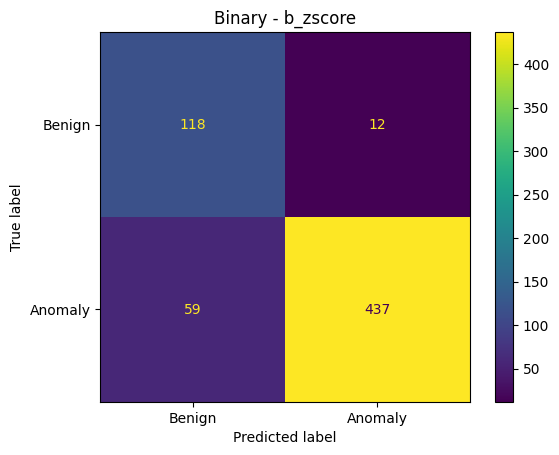

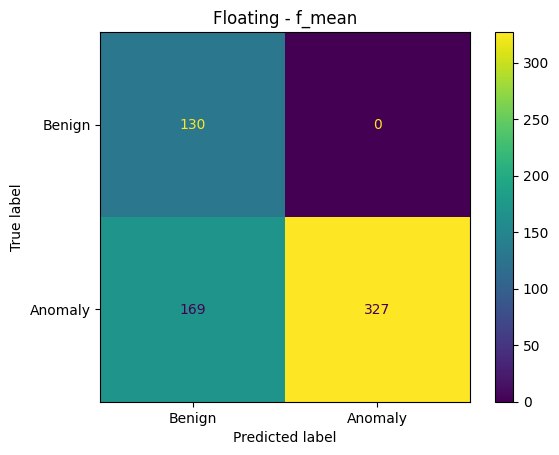

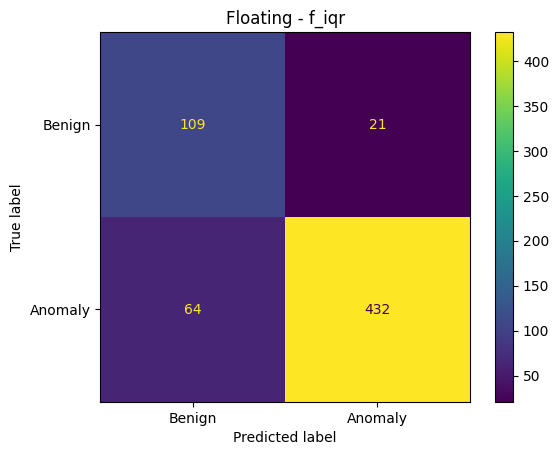

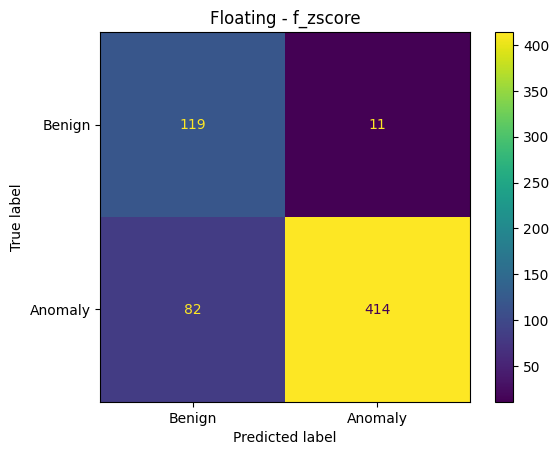

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [24]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9254197579070675
F2-Binary-b_iqr: 0.9190457567461869
F2-Binary-b_zscore: 0.8980682285244554
F2-Floating-f_mean: 0.7074859368238857
F2-Floating-f_iqr: 0.8863356585966352
F2-Floating-f_zscore: 0.8592777085927771


### FPR Score

In [25]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.7923076923076923
FPR-Binary-b_iqr: 0.7923076923076923
FPR-Binary-b_zscore: 0.09230769230769231
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.16153846153846155
FPR-Floating-f_zscore: 0.08461538461538462


In [26]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.8003194888178914
Accuracy-Binary-b_iqr: 0.7939297124600639
Accuracy-Binary-b_zscore: 0.8865814696485623
Accuracy-Floating-f_mean: 0.7300319488817891
Accuracy-Floating-f_iqr: 0.8642172523961661
Accuracy-Floating-f_zscore: 0.8514376996805112


In [27]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.955645,0.925420,0.792308,0.800319
b_iqr,0.947581,0.919046,0.792308,0.793930
b_zscore,0.881048,0.898068,0.092308,0.886581
f_mean,0.659274,0.707486,0.000000,0.730032
f_iqr,0.870968,0.886336,0.161538,0.864217
f_zscore,0.834677,0.859278,0.084615,0.851438


In [28]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [29]:
# %pip install openpyxl